Esse código é uma nova versão do "projeto_mosquitos", onde foi realizado a extração de mel espectrogramas dos áudios pertencentes ao conjunto de dados do projeto. 
Essa nova versão, chamada de "projeto_mosquito_V2", pretende apresentar uma visão mais clara e lógica do projeto, trazendo também algumas abordagens novas e diferentes da versão anterior.

A primeira mudança está no resample dos áudios, que antes eram de 8.0 kHz, para 16.0 kHz - Talvez essa mudança não seja concreta, pois o aumento da taxa de amostragem (sample rate) pode acabar consumindo mais memoria.



## Carregando o conjunto de dados:
#### Resampleando os áudios e armazenando

In [10]:
import os
import soundfile as sf
import librosa

# Esses são os caminhos dos diretórios com os áudios
aedes_dir = r'C:\Users\Alan Mathias\projeto_mosquitos\dataset\Selected_Aedes_Aegypti' # 8.000 Hz
anopholes_dir = r'C:\Users\Alan Mathias\projeto_mosquitos\dataset\Anopholes_Gambiae'  # 8.000 Hz

# Diretórios de saída para salvar os áudios
aedes_out_dir = r'C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\resampled_aedes'
anopholes_out_dir = r'C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\resampled_anopholes'

# Função para carregar os arquivos de áudio em cada diretório
def load_audio_files(directory, out_directory):
    audio_files = []
    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            filepath = os.path.join(directory, filename)
            out_filepath = os.path.join(out_directory, filename)
            audio, sr = librosa.load(filepath, sr=16000)  # resample para 16kHz
            sf.write(out_filepath, audio, sr)  # salvar arquivo com novo sample rate
            audio_files.append(audio)
    return audio_files

# Carregar os arquivos de áudio de cada diretório e salvá-los em diferentes diretórios
aedes_audios = load_audio_files(aedes_dir, aedes_out_dir)
anopholes_audios = load_audio_files(anopholes_dir, anopholes_out_dir)

# Verificar o número de arquivos carregados em cada diretório
print(f'Número de áudios de Aedes Aegypti: {len(aedes_audios)}')
print(f'Número de áudios de Anopholes Gambiae: {len(anopholes_audios)}')


Número de áudios de Aedes Aegypti: 3739
Número de áudios de Anopholes Gambiae: 3672


## Aplicação do filtro de pré-ênfase:
#### melhora a clareza do sinal de áudio, amplificando as frequências mais altas. Esse passo poderia ser realizado diretamente em uma função que extraia os espectrogramas de áudios, mas decidi realizar separadamente apenas para fins de conhecimento.

In [14]:
import os
import soundfile as sf
import librosa

# Esses são os caminhos dos diretórios com os áudios
aedes_dir = r'C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\resampled_aedes' # 16.000 Hz
anopholes_dir = r'C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\resampled_anopholes'  # 16.000 Hz

# Diretórios de saída para salvar os áudios com pré-ênfase
aedes_out_dir = r'C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes'
anopholes_out_dir = r'C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes'

# Função para carregar os arquivos de áudio em cada diretório e aplicar o filtro de pré-ênfase
def load_audio_files_with_preemph(directory, out_directory):
    audio_files = []
    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            filepath = os.path.join(directory, filename)
            out_filepath = os.path.join(out_directory, filename)
            audio, sr = librosa.load(filepath, sr=16000)  # resample para 16kHz - que já havia sido realizado, talvez devesse retirar
            audio_preemph = librosa.effects.preemphasis(audio) # aplicar o filtro de pré-ênfase
            sf.write(out_filepath, audio_preemph, sr)  # salvar arquivo com filtro aplicado
            audio_files.append(audio_preemph)
    return audio_files

# Carregar os arquivos de áudio de cada diretório e salvá-los em diferentes diretórios com pré-ênfase aplicado
aedes_audios_preemph = load_audio_files_with_preemph(aedes_dir, aedes_out_dir)
anopholes_audios_preemph = load_audio_files_with_preemph(anopholes_dir, anopholes_out_dir)

# Verificar o número de arquivos carregados em cada diretório
print(f'Número de áudios de Aedes Aegypti: {len(aedes_audios_preemph)}')
print(f'Número de áudios de Anopholes Gambiae: {len(anopholes_audios_preemph)}')


Número de áudios de Aedes Aegypti: 3739
Número de áudios de Anopholes Gambiae: 3672


## Visualizando a densidade espectral de um áudio de cada tipo:
#### para identificar a distribuição de energia em diferentes faixas de frequência. Essa informação pode ser útil para entender melhor as características do som presente nos áudios.

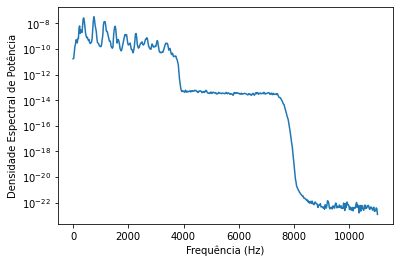

In [21]:
from scipy import signal
import librosa

# carregue o arquivo de áudio usando o Librosa
audio, sr = librosa.load('C:\\Users\\Alan Mathias\\projeto_mosquito_V2\\dataset\\preemph_aedes/aedes_aegypti (1915).wav')

# calcule a densidade espectral de potência do áudio usando a função scipy.signal.welch
frequencies, power_density = signal.welch(audio, sr, nperseg=1024)

# plot o resultado
import matplotlib.pyplot as plt
plt.semilogy(frequencies, power_density)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Densidade Espectral de Potência')
plt.show()

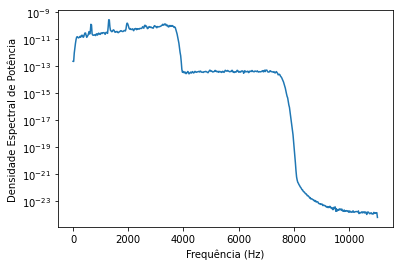

In [22]:
from scipy import signal
import librosa

# carregue o arquivo de áudio usando o Librosa
audio, sr = librosa.load('C:\\Users\\Alan Mathias\\projeto_mosquito_V2\\dataset\\preemph_anopholes/anopholes_gambiae (2524).wav')

# calcule a densidade espectral de potência do áudio usando a função scipy.signal.welch
frequencies, power_density = signal.welch(audio, sr, nperseg=1024)

# plot o resultado
import matplotlib.pyplot as plt
plt.semilogy(frequencies, power_density)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Densidade Espectral de Potência')
plt.show()

## Extraindo a densidade espectral de todos os áudios do conjunto de dados:
#### armanzando esses dados em um arquivo csv, até o momento esses dados são apenas para fins de analise, isto é, não serão utilizado efetivamente no processo do projeto.

In [23]:
import os
import csv
import numpy as np
from scipy import signal
import librosa

# Caminho para os diretórios com os áudios
aedes_dir = r'C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes'
anopholes_dir = r'C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes'

# Caminho para o arquivo CSV de saída
csv_path = r'C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\audio_features.csv'

# Frequência de amostragem dos áudios
fs = 16000
# Função para calcular a densidade espectral de potência
def calculate_power_spectral_density(audio):
    f, Pxx = signal.welch(audio, fs, nperseg=1024, scaling='density')
    return f, Pxx

# Cria um arquivo CSV para armazenar as informações
with open(csv_path, mode='w', newline='') as csv_file:
    fieldnames = ['file_name', 'class', 'frequencies', 'psd']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

    # Percorre todos os arquivos de áudio em cada diretório
    for directory, label in [(aedes_dir, 'Aedes Aegypti'), (anopholes_dir, 'Anopholes Gambiae')]:
        for filename in os.listdir(directory):
            if filename.endswith('.wav'):
                file_path = os.path.join(directory, filename)
                print(f'Processando arquivo {file_path}...')
                # Carrega o arquivo de áudio
                audio, _ = librosa.load(file_path, sr=fs)
                # Calcula a densidade espectral de potência
                frequencies, psd = calculate_power_spectral_density(audio)
                # Armazena as informações em um arquivo CSV
                row = {'file_name': filename, 'class': label, 'frequencies': frequencies.tolist(), 'psd': psd.tolist()}
                writer.writerow(row)

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (100).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1000).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1002).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1003).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1004).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1005).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1007).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (101).wav.

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1150).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1152).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1153).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1155).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1159).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1160).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1162).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1163).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1165)

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1304).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1306).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1307).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (131).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1311).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1312).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1315).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1316).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1318).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1451).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1456).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1457).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1459).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1466).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1467).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1469).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1470).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1472)

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1599).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (16).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (160).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1604).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1605).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1606).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1608).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1609).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (161).wav

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1725).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1726).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1728).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1730).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1733).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1736).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1737).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (174).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1741).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1921).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1922).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1923).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1927).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (193).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1931).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1932).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1933).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (1934).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2100).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2102).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2103).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2104).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2105).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2106).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2107).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (211).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2114).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2260).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2262).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2263).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2265).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2268).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (227).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2278).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2279).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (228).w

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2418).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2419).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (242).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2422).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2423).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2424).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2425).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2427).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2429).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2573).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2575).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2579).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (258).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2581).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2582).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2584).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2587).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2589).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2699).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2701).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2705).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2706).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2707).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2708).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2709).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2712).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2714)

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2850).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2853).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2854).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2855).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2857).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2858).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2859).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (286).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2861).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2987).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2988).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2990).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2992).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2993).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2994).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2996).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (2998).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (300).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3125).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3126).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3127).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3129).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3134).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3136).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3137).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3138).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3139)

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3235).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3237).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3238).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3239).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3240).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3241).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3242).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3245).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3246)

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3373).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3374).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3375).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3377).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3378).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3379).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (338).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3380).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3382).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3508).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (351).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3510).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3513).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3514).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3516).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3517).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3519).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (352).w

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3643).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (365).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3653).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3657).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3658).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3660).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3662).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3664).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3665).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (379).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3790).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3791).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3793).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3794).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3795).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3796).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3798).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (380).w

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3917).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3919).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (392).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3920).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3923).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3926).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3927).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3929).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (3933).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4053).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4056).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4058).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4059).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (406).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4061).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4063).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4066).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4067).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4213).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4221).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4223).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4225).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4227).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4229).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (423).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4230).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4232).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4367).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4368).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4370).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4376).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4377).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4378).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (438).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4380).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4381).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4506).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (451).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4511).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4515).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4519).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (452).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4522).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4524).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4530).w

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4639).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (464).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4640).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4641).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4643).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4644).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4645).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4646).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4647).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4768).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4769).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (477).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4770).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4771).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4773).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4774).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4775).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4776).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4891).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4892).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4893).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4898).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (49).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4902).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4903).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4905).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (4907).w

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (503).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5032).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5033).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5035).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5036).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (504).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5042).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5044).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5047).w

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5185).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5186).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5189).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (519).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5192).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5193).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5195).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5198).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (520).w

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5347).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5350).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5351).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5354).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5355).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5358).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5359).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (536).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5361).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5519).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (552).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5520).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5522).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5523).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5525).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5526).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5527).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5529).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (565).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5653).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5654).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5655).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5656).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5659).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (566).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5660).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5661).w

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5778).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5779).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (578).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5781).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5784).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5785).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5788).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (579).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5792).w

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5909).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5911).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5912).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5914).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5916).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5917).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5918).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (5919).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (592).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (605).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6053).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6056).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6058).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6059).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (606).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6063).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6066).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6068).w

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6209).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (621).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6213).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6215).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6216).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6217).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6219).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (622).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6221).w

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6348).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6349).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (635).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6350).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6351).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6353).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6354).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6356).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6357).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6490).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6493).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6494).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6495).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6496).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6497).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6498).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (65).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6502).w

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6621).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6623).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6626).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6627).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6628).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6629).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6630).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6631).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6635)

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (676).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6761).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6762).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6768).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6769).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6770).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6771).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6775).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6780).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6914).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6917).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6919).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (692).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6920).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6923).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6928).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6932).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (6933).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (7062).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (7063).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (7065).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (7067).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (7068).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (7069).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (707).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (7070).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (7071).

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (777).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (779).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (78).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (782).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (783).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (784).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (785).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (788).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (79).wav...
Pro

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (925).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (927).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (93).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (932).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (933).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (934).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (935).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (936).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_aedes\aedes_aegypti (937).wav...
Pr

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (104).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1040).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1041).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1042).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1043).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1044).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1045).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1046).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1109).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (111).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1110).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1111).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1112).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1113).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1114).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1115).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1186).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1187).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1188).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1189).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (119).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1190).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1191).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1192).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1257).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1258).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1259).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (126).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1260).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1261).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1262).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1263).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1332).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1333).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1334).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1335).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1336).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1337).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1338).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1339).wav...
Processando arquivo C:\Users\Alan Mathia

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1404).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1405).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1406).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1407).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1408).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1409).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (141).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1410).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1474).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1475).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1476).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1477).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1478).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1479).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (148).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1480).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1542).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1543).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1544).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1545).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1546).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1547).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1548).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1549).wav...
Processando arquivo C:\Users\Alan Mathia

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1625).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1626).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1627).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1628).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1629).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (163).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1631).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1632).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1701).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1702).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1703).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1704).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1705).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1706).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1707).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1708).wav...
Processando arquivo C:\Users\Alan Mathia

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1775).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1776).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1777).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1778).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1779).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (178).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1780).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1781).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1844).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1845).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1847).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1848).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1849).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (185).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1850).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1851).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1917).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1918).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1919).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (192).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1920).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1921).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1922).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1923).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1989).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (199).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1990).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1991).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1992).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1993).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1994).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (1995).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2070).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2071).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2072).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2073).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2074).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2075).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2076).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2077).wav...
Processando arquivo C:\Users\Alan Mathia

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2135).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2136).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2137).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2138).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2139).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (214).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2140).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2141).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2209).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (221).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2210).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2211).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2212).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2213).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2214).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2215).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2274).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2275).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2276).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2277).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2278).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2279).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (228).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2280).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2352).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2353).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2354).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2355).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2356).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2357).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2358).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2359).wav...
Processando arquivo C:\Users\Alan Mathia

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2421).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2422).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2423).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2424).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2425).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2426).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2427).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2428).wav...
Processando arquivo C:\Users\Alan Mathia

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2497).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2498).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2499).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (25).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (250).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2500).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2501).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2502).wav...
Processando arquivo C:\Users\Alan Mathias\p

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2570).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2571).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2572).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2573).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2574).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2575).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2576).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2577).wav...
Processando arquivo C:\Users\Alan Mathia

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2639).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (264).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2640).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2641).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2642).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2643).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2644).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2645).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2706).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2707).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2708).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2709).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (271).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2710).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2711).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2712).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2776).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2777).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2778).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2779).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (278).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2781).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2782).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2783).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2842).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2843).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2844).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2845).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2846).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2847).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2848).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2849).wav...
Processando arquivo C:\Users\Alan Mathia

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2912).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2913).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2914).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2915).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2916).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2917).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2918).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2919).wav...
Processando arquivo C:\Users\Alan Mathia

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2983).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2984).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2985).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2986).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2987).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2988).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (2989).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (299).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3054).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3055).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3056).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3057).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3058).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3059).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (306).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3060).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3123).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3124).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3125).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3126).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3127).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3128).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3129).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (313).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3196).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3197).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3198).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3199).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (32).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (320).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3200).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3201).wav...
Processando arquivo C:\Users\Alan Mathias\p

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (326).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3260).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3261).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3262).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3263).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3264).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3265).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3266).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3325).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3326).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3327).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3328).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3329).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (333).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3330).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3331).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3392).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3393).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3394).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3395).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3396).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3397).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3398).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3399).wav...
Processando arquivo C:\Users\Alan Mathia

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3458).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3459).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (346).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3460).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3461).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3462).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3463).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3464).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3526).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3527).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3528).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3529).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (353).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3530).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3531).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3532).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3594).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3595).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3596).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3597).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3598).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3599).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (36).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (360).wav...
Processando arquivo C:\Users\Alan Mathias\p

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3657).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3658).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3659).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (366).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3660).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3661).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3662).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3663).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3724).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3725).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3726).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3727).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3728).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3729).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (373).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (3730).wav...
Processando arquivo C:\Users\Alan Mathias

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (40).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (400).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (401).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (402).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (403).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (404).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (405).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (406).wav...
Processando arquivo C:\Users\Alan Mathias\projeto

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (468).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (469).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (47).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (470).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (471).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (472).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (473).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (474).wav...
Processando arquivo C:\Users\Alan Mathias\projeto

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (536).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (537).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (538).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (539).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (54).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (540).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (541).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (542).wav...
Processando arquivo C:\Users\Alan Mathias\projeto

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (605).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (606).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (607).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (608).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (609).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (61).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (610).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (611).wav...
Processando arquivo C:\Users\Alan Mathias\projeto

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (674).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (675).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (676).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (677).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (678).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (679).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (68).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (680).wav...
Processando arquivo C:\Users\Alan Mathias\projeto

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (743).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (744).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (745).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (746).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (748).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (749).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (75).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (750).wav...
Processando arquivo C:\Users\Alan Mathias\projeto

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (813).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (814).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (815).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (816).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (817).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (818).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (819).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (82).wav...
Processando arquivo C:\Users\Alan Mathias\projeto

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (886).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (887).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (888).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (889).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (89).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (890).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (891).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (892).wav...
Processando arquivo C:\Users\Alan Mathias\projeto

Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (96).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (960).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (961).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (962).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (963).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (964).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (965).wav...
Processando arquivo C:\Users\Alan Mathias\projeto_mosquito_V2\dataset\preemph_anopholes\anopholes_gambiae (966).wav...
Processando arquivo C:\Users\Alan Mathias\projeto

Esse arquivo csv pode ser analisado para encontrar algum tipo de diferença entre os áudios, pois, caso algum áudio esteja diferente do padrão, esse áudio deve ser analisado para verificar se existe alguma anomalia.

## Extraindo os espectrogramas de todos os áudios do conjunto de dados:

In [26]:
import librosa
import librosa.display
import numpy as np
import os
import matplotlib.pyplot as plt

# Definir os diretórios de entrada e saída
input_dir = 'C:\\Users\\Alan Mathias\\projeto_mosquito_V2\\dataset\\'
output_dir = 'C:\\Users\\Alan Mathias\\projeto_mosquito_V2\\spectrograms\\'

# Definir parâmetros para o espectrograma
n_fft = 2048
hop_length = 512
n_mels = 128
f_min = 0
f_max = 8000

# Definir classes e seus respectivos diretórios
classes = ['preemph_aedes', 'preemph_anopholes']
class_dirs = [os.path.join(input_dir, c) for c in classes]

# Para cada classe
for class_dir, class_name in zip(class_dirs, classes):
    # Criar pasta para a classe
    class_output_dir = os.path.join(output_dir, class_name)
    os.makedirs(class_output_dir, exist_ok=True)

    # Para cada arquivo de áudio na pasta da classe
    for audio_file in os.listdir(class_dir):
        # Carregar o arquivo de áudio
        audio_path = os.path.join(class_dir, audio_file)
        y, sr = librosa.load(audio_path, sr=None)

        # Calcular o espectrograma mel
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=
                                           hop_length, n_mels=n_mels, fmin=f_min, fmax=f_max)
        S_db = librosa.power_to_db(S, ref=np.max)

        # Salvar o espectrograma como arquivo png
        spectrogram_path = os.path.join(class_output_dir, os.path.splitext(audio_file)[0] + '.png')
        plt.figure(figsize=(2.56, 2.56), dpi=100)
        librosa.display.specshow(S_db, x_axis='time', y_axis='mel', sr=sr, hop_length=hop_length, cmap='magma')
        plt.axis('off')
        plt.savefig(spectrogram_path, bbox_inches='tight', pad_inches=0)
        plt.close()


In [32]:
import os
import shutil
import random

input_dir = 'C:\\Users\\Alan Mathias\\projeto_mosquito_V2\\spectrograms\\'
output_dir = 'C:\\Users\\Alan Mathias\\projeto_mosquito_V2\\dataset_split\\'

# proporções para divisão dos dados
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# classes e seus respectivos diretórios
classes = ['preemph_aedes_spec', 'preemph_anopholes_espec']
class_dirs = [os.path.join(input_dir, c) for c in classes]

# Para cada classe
for class_dir, class_name in zip(class_dirs, classes):
    # Crie uma pastas para treino, validação e teste
    train_dir = os.path.join(output_dir, 'train', class_name)
    val_dir = os.path.join(output_dir, 'val', class_name)
    test_dir = os.path.join(output_dir, 'test', class_name)
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Obtem a lista de arquivos para a classe
    file_list = os.listdir(class_dir)
    num_files = len(file_list)

    # Define os índices para divisão dos dados
    indices = list(range(num_files))
    random.shuffle(indices)
    train_split = int(num_files * train_ratio)
    val_split = int(num_files * (train_ratio + val_ratio))

    # Dividir os dados em treino, validação e teste
    train_indices = indices[:train_split]
    val_indices = indices[train_split:val_split]
    test_indices = indices[val_split:]

    # Copiar arquivos para as pastas de treino, validação e teste
    for idx in train_indices:
        file_name = file_list[idx]
        src_path = os.path.join(class_dir, file_name)
        dst_path = os.path.join(train_dir, file_name)
        shutil.copy(src_path, dst_path)

    for idx in val_indices:
        file_name = file_list[idx]
        src_path = os.path.join(class_dir, file_name)
        dst_path = os.path.join(val_dir, file_name)
        shutil.copy(src_path, dst_path)

    for idx in test_indices:
        file_name = file_list[idx]
        src_path = os.path.join(class_dir, file_name)
        dst_path = os.path.join(test_dir, file_name)
        shutil.copy(src_path, dst_path)

    print(f'Class: {class_name}')
    print(f'Number of files in train set: {len(train_indices)}')
    print(f'Number of files in validation set: {len(val_indices)}')
    print(f'Number of files in test set: {len(test_indices)}')

Class: preemph_aedes_spec
Number of files in train set: 2991
Number of files in validation set: 374
Number of files in test set: 374
Class: preemph_anopholes_espec
Number of files in train set: 2937
Number of files in validation set: 367
Number of files in test set: 368
